In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
data = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\seniors_data.csv")
data.shape

(2469827, 28)

In [48]:
payer_distribution = data.groupby('payer')['unique_member_cnt'].sum().reset_index()
payer_distribution.rename(columns={'unique_member_cnt': 'total_population'}, inplace=True)

payer_distribution

,payer,total_population
0,COMMERCIAL,14902799.0
1,MEDICARE,254162166.0
2,MINNESOTA HEALTH CARE PROGRAMS,6669330.0


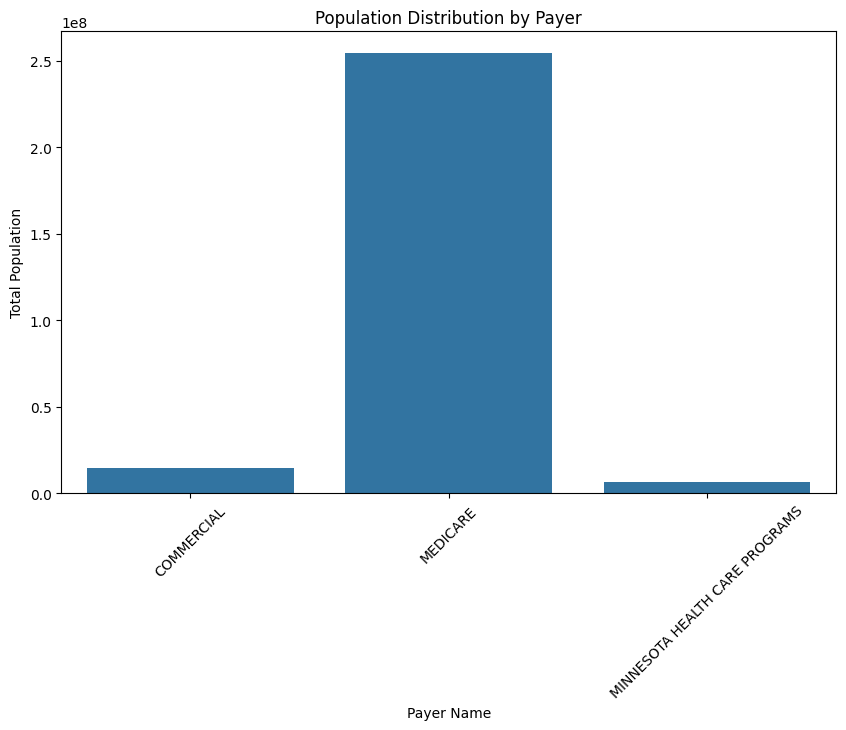

In [49]:
plt.figure(figsize=(10, 6))  # 可以调整图的大小
sns.barplot(x='payer', y='total_population', data=payer_distribution)

plt.title('Population Distribution by Payer')
plt.xlabel('Payer Name')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()

In [50]:
payer_distribution = data.groupby('payer')['unique_member_cnt'].sum().reset_index()
payer_distribution.rename(columns={'unique_member_cnt': 'total_population'}, inplace=True)

payer_distribution

,payer,total_population
0,COMMERCIAL,14902799.0
1,MEDICARE,254162166.0
2,MINNESOTA HEALTH CARE PROGRAMS,6669330.0


In [51]:
data.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
payer                       object
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
county_name                 object
age_group_code             float64
age_group_name              object
sex                         object
unique_member_cnt          float64
svc_code_ctg_desc           object
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
service                     object
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
dtype: object

In [52]:
ml_data = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\data_for_ml.csv")
ml_data.shape

(6700685, 25)

In [53]:
ml_data.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
age_group_code             float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int64
service_encoded              int64
payer_encoded                int64
dtype: object

In [54]:
ml_data = ml_data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)
ml_data.dtypes

insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
age_group_code             float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int64
service_encoded              int64
payer_encoded                int64
dtype: object

In [55]:
ml_data["age_group_code"].unique()

array([1., 2., 3., 5., 4.])

In [56]:
filtered_df = ml_data.loc[ml_data['age_group_code'].isin([4,5])]

In [57]:
filtered_df.shape

(2469827, 23)

In [58]:
filtered_df.dtypes

insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
age_group_code             float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int64
service_encoded              int64
payer_encoded                int64
dtype: object

In [59]:
data_to_drop = ["insurer_paid_amt_mean",
"insurer_paid_amt_sum",
"member_paid_amt_mean",
"member_paid_amt_sum",
"total_paid_amt_mean",
"total_paid_amt_sum",
"total_paid_amt_median",
"insurer_paid_amt_median",
"member_paid_amt_median",
"insurer_paid_sum_prop",
"insurer_paid_mean_prop",
"member_paid_sum_prop"
]

In [60]:
ml_data = ml_data.drop(data_to_drop,axis=1)
ml_data.dtypes

service_year             float64
county_code              float64
age_group_code           float64
unique_member_cnt        float64
clm_cnt                  float64
member_months            float64
member_paid_mean_prop    float64
average_ops_cnt          float64
sex_encoded                int64
service_encoded            int64
payer_encoded              int64
dtype: object

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [62]:
X = ml_data.drop(["member_paid_mean_prop"],axis=1)
y = ml_data["member_paid_mean_prop"]
ss = StandardScaler()
X = ss.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5360548, 10), (1340137, 10), (5360548,), (1340137,))

In [64]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 创建 DMatrix 数据

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_train_samples = dtrain.get_label().shape[0]
num_test_samples = dtest.get_label().shape[0]

print("训练集样本数量:", num_train_samples)
print("测试集样本数量:", num_test_samples)

# 设置参数，包括使用 GPU
params = {
    'tree_method': 'hist',  # 更新为 hist
    'device': 'cuda',       # 指定使用 cuda
    'objective': 'reg:squarederror',
    'eval_metric': 'logloss',
}

# 训练模型c
n_acc = []
bst = xgb.train(params, dtrain, num_boost_round=1000)

    # 预测
preds = bst.predict(dtest)
pred_labels = np.argmax(preds)

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3,
                    num_boost_round=3, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)
importance = bst.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# 打印特征重要性
for feature, score in sorted_importance:
    print(f'Feature: {feature}, Score: {score}')

(5360548, 10) (1340137, 10) (5360548,) (1340137,)
训练集样本数量: 5360548
测试集样本数量: 1340137
Feature: f1, Score: 11966.0
Feature: f8, Score: 11451.0
Feature: f6, Score: 7963.0
Feature: f9, Score: 7415.0
Feature: f2, Score: 5751.0
Feature: f0, Score: 5232.0
Feature: f5, Score: 5120.0
Feature: f4, Score: 3692.0
Feature: f3, Score: 3042.0
Feature: f7, Score: 910.0


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假设 preds 是模型的预测结果，y_test 是真实的目标值
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}')

MSE: 0.009381636824263587, RMSE: 0.09685885000485803, MAE: 0.06104730231627459, R²: 0.5728940047182218
